<a href="https://colab.research.google.com/github/BelongsToMe091603/Portfolio-MN/blob/main/Text_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Import Library

In [ ]:
import pandas as pd
from google.colab import drive
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# 2. Unzip & Load Dataset

In [ ]:
# hubungkan Google Colab dengan Google Drive kalian.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Unzip dataset yang telah di download
!unzip "/content/drive/MyDrive/KecerdasanBuatan/text_classification_1_sentiment labelled.zip"

Archive:  /content/drive/MyDrive/KecerdasanBuatan/text_classification_1_sentiment labelled.zip
replace sentiment labelled sentences/amazon_cells_labelled.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
# Load dataset
df = pd.read_csv('/content/sentiment labelled sentences/yelp_labelled.txt', names=['sentence', 'label'], sep='\t')

In [ ]:
df

,sentence,label
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
...,...,...
995,I think food should have flavor and texture an...,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go b...,0
998,"The whole experience was underwhelming, and I ...",0


In [ ]:
# Munculkan informasi mengenai dataset menggunakan info()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   sentence  1000 non-null   object
 1   label     1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


In [ ]:
# Munculkan 20 Data awal
print(df.head(20))

                                             sentence  label
0                            Wow... Loved this place.      1
1                                  Crust is not good.      0
2           Not tasty and the texture was just nasty.      0
3   Stopped by during the late May bank holiday of...      1
4   The selection on the menu was great and so wer...      1
5      Now I am getting angry and I want my damn pho.      0
6               Honeslty it didn't taste THAT fresh.)      0
7   The potatoes were like rubber and you could te...      0
8                           The fries were great too.      1
9                                      A great touch.      1
10                           Service was very prompt.      1
11                                 Would not go back.      0
12  The cashier had no care what so ever on what I...      0
13  I tried the Cape Cod ravoli, chicken,with cran...      1
14  I was disgusted because I was pretty sure that...      0
15  I was shocked becaus

In [ ]:
# Munculkan data ke 20-40 dari kolom "sentence"
df['sentence'][20:40]

20                                  The Burrittos Blah!
21                                   The food, amazing.
22                                Service is also cute.
23    I could care less... The interior is just beau...
24                                   So they performed.
25    That's right....the red velvet cake.....ohhh t...
26           - They never brought a salad we asked for.
27    This hole in the wall has great Mexican street...
28    Took an hour to get our food only 4 tables in ...
29                    The worst was the salmon sashimi.
30    Also there are combos like a burger, fries, an...
31                        This was like the final blow!
32    I found this place by accident and I could not...
33    seems like a good quick place to grab a bite o...
34                    Overall, I like this place a lot.
35    The only redeeming quality of the restaurant w...
36                      Ample portions and good prices.
37    Poor service, the waiter made me feel like

In [ ]:
# Munculkan data yang memiliki nilai 1 pada kolom "label"
df[df['label'] == 1]

,sentence,label
0,Wow... Loved this place.,1
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
8,The fries were great too.,1
9,A great touch.,1
...,...,...
899,"Overall, a great experience.",1
901,Their regular toasted bread was equally satisf...,1
907,The chips and sals a here is amazing!!!!!!!!!!...,1
909,This is my new fav Vegas buffet spot.,1


In [ ]:
# Ubah nama dari pada kolom "sentence" menjadi "kalimat"
df = df.rename(columns={"sentence" : "kalimat"})

In [ ]:
df

,kalimat,label
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
...,...,...
995,I think food should have flavor and texture an...,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go b...,0
998,"The whole experience was underwhelming, and I ...",0


# 3. Prepare Dataset For Making a Model

In [ ]:
# buatlah variabel untuk menampung value dari data label
kalimat = df['kalimat'].values
# YOUR CODE HERE
y= df['label'].values

# Bagi dataset menjadi data train dan data test menjadi 80% train dan 20% test
from sklearn.model_selection import train_test_split
# YOUR CODE HERE
kalimat_latih, kalimat_test, y_latih, y_test = train_test_split(kalimat, y, test_size = 0.2, random_state = 42)

In [ ]:
# Tampilkan banyaknya data pada data train
print('Jumlah data pada data train:', len(kalimat_latih))

Jumlah data pada data train: 800


In [ ]:
# Tampilkan banyaknya data pada data test
print('Jumlah data pada data test:', len(y_test))

Jumlah data pada data test: 200


In [ ]:
# Tampilkan 5 data awal data_train dan 5 data awal data_test
kalimat_latih[0:5]

array(['The worst was the salmon sashimi.',
       'An excellent new restaurant by an experienced Frenchman.',
       'Went for lunch - service was slow.',
       'I think this restaurant suffers from not trying hard enough.',
       'Just had lunch here and had a great experience.'], dtype=object)

In [ ]:
y_test[0:5]

array([1, 1, 1, 1, 1])

In [ ]:
# Lakukan Tokenizer pada dengan num_words=250 dan oov_token='x'
# Referensi : https://www.kdnuggets.com/2020/03/tensorflow-keras-tokenization-text-data-prep.html
from tensorflow.keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(num_words=250, oov_token='x')

# Lakukan fit_on_texts pada data_train dan data_test (mengambil kata dalam kalimat untuk dirubah menjadi angka)

tokenizer.fit_on_texts(kalimat_latih)     # YOUR CODE HERE
tokenizer.fit_on_texts(kalimat_test)     # YOUR CODE HERE

In [ ]:
# Tampilkan data kata yang sudah dirubah kedalam bentuk angka dengan menggunakan fungsi .index_word
# YOUR CODE HERE
tokenizer.index_word

{1: 'x',
 2: 'the',
 3: 'and',
 4: 'i',
 5: 'was',
 6: 'a',
 7: 'to',
 8: 'is',
 9: 'this',
 10: 'it',
 11: 'of',
 12: 'food',
 13: 'not',
 14: 'for',
 15: 'in',
 16: 'place',
 17: 'good',
 18: 'service',
 19: 'we',
 20: 'very',
 21: 'my',
 22: 'with',
 23: 'had',
 24: 'great',
 25: 'that',
 26: 'be',
 27: 'so',
 28: 'were',
 29: 'are',
 30: 'but',
 31: 'have',
 32: 'back',
 33: 'you',
 34: 'here',
 35: 'they',
 36: 'on',
 37: 'at',
 38: 'like',
 39: 'go',
 40: 'all',
 41: 'time',
 42: 'our',
 43: 'will',
 44: 'as',
 45: 'there',
 46: 'really',
 47: 'just',
 48: 'an',
 49: 'their',
 50: 'if',
 51: 'best',
 52: 'ever',
 53: 'would',
 54: 'friendly',
 55: 'also',
 56: 'never',
 57: 'up',
 58: 'one',
 59: 'only',
 60: 'restaurant',
 61: 'no',
 62: 'out',
 63: 'your',
 64: 'nice',
 65: "don't",
 66: 'from',
 67: 'amazing',
 68: 'what',
 69: 'been',
 70: 'again',
 71: 'delicious',
 72: 'vegas',
 73: 'did',
 74: 'by',
 75: 'which',
 76: 'experience',
 77: 'me',
 78: 'some',
 79: 'pretty',
 8

In [ ]:
# rubah kalimat yang ada pada data_train dan data_test menjadi angka atau sequence
# Tips: gunakan fungsi texts_to_sequences


sekuens_latih = tokenizer.texts_to_sequences(kalimat_latih)# YOUR CODE HERE
sekuens_test = tokenizer.texts_to_sequences(kalimat_test)# YOUR CODE HERE

In [ ]:
kalimat_latih[0:5]

array(['The worst was the salmon sashimi.',
       'An excellent new restaurant by an experienced Frenchman.',
       'Went for lunch - service was slow.',
       'I think this restaurant suffers from not trying hard enough.',
       'Just had lunch here and had a great experience.'], dtype=object)

In [ ]:
# Tampilkan kembali 5 data awal pada data_train dan data_test
# YOUR CODE HERE
sekuens_test[0:5]

[[50, 33, 1, 1, 34, 39, 142],
 [215, 125, 15, 2, 1, 7, 76, 78, 155, 12, 3, 1, 54, 18],
 [2, 60, 8, 20, 194, 3, 121, 6, 244, 60, 160, 7, 10],
 [4, 1, 93, 2, 1, 1, 1, 1, 3, 1, 1, 99, 67, 68, 35, 143, 22, 1],
 [157, 1, 1, 230, 3, 1]]

In [ ]:
# tampilkan 5 data sekuens_latih
# YOUR CODE HERE
sekuens_latih[0:5]

[[2, 110, 5, 2, 1, 1],
 [48, 166, 1, 60, 74, 48, 1, 1],
 [132, 14, 167, 18, 5, 152],
 [4, 106, 9, 60, 1, 66, 13, 1, 1, 141],
 [47, 23, 167, 34, 3, 23, 6, 24, 76]]

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Buatlah padding pada kalimat dengan maxlen=20

padded_latih = pad_sequences(sekuens_latih, padding='post', maxlen=20)  # YOUR CODE HERE)
padded_test = pad_sequences(sekuens_test, padding='post', maxlen=20)    # YOUR CODE HERE)

In [ ]:
# Tampilkan 5 data sekuens_latih
# YOUR CODE HERE
sekuens_latih[0:5]

[[2, 110, 5, 2, 1, 1],
 [48, 166, 1, 60, 74, 48, 1, 1],
 [132, 14, 167, 18, 5, 152],
 [4, 106, 9, 60, 1, 66, 13, 1, 1, 141],
 [47, 23, 167, 34, 3, 23, 6, 24, 76]]

In [ ]:
# Tampilkan 5 data padded_latih
# YOUR CODE HERE
padded_latih[0:5]

array([[  2, 110,   5,   2,   1,   1,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0],
       [ 48, 166,   1,  60,  74,  48,   1,   1,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0],
       [132,  14, 167,  18,   5, 152,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0],
       [  4, 106,   9,  60,   1,  66,  13,   1,   1, 141,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0],
       [ 47,  23, 167,  34,   3,  23,   6,  24,  76,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0]], dtype=int32)

# 4. Make A Model

In [ ]:
import tensorflow as tf
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(250, 15, input_length=20),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24, activation='relu'),
    # tambahkan 1 layers Dense terakhir
    # YOUR CODE HERE
    tf.keras.layers.Dense(1, activation='sigmoid'),
])

# Buatlah model.compile seperti yang sudah dipelajari
# YOUR CODE HERE
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# Buatlah model.fit untuk melatih data

num_epochs = 30
history = model.fit(padded_latih, y_latih, epochs=num_epochs, validation_data=(padded_test, y_test)) # YOUR CODE HERE

Epoch 1/30
25/25 [==============================] - 1s 13ms/step - loss: 0.6924 - accuracy: 0.5175 - val_loss: 0.6918 - val_accuracy: 0.5950
Epoch 2/30
25/25 [==============================] - 0s 4ms/step - loss: 0.6895 - accuracy: 0.6175 - val_loss: 0.6893 - val_accuracy: 0.5800
Epoch 3/30
25/25 [==============================] - 0s 3ms/step - loss: 0.6839 - accuracy: 0.6300 - val_loss: 0.6848 - val_accuracy: 0.5800
Epoch 4/30
25/25 [==============================] - 0s 4ms/step - loss: 0.6739 - accuracy: 0.6625 - val_loss: 0.6764 - val_accuracy: 0.6000
Epoch 5/30
25/25 [==============================] - 0s 3ms/step - loss: 0.6585 - accuracy: 0.6975 - val_loss: 0.6643 - val_accuracy: 0.6300
Epoch 6/30
25/25 [==============================] - 0s 3ms/step - loss: 0.6378 - accuracy: 0.7312 - val_loss: 0.6483 - val_accuracy: 0.6550
Epoch 7/30
25/25 [==============================] - 0s 4ms/step - loss: 0.6116 - accuracy: 0.7600 - val_loss: 0.6301 - val_accuracy: 0.6700
Epoch 8/30
25/25 [=

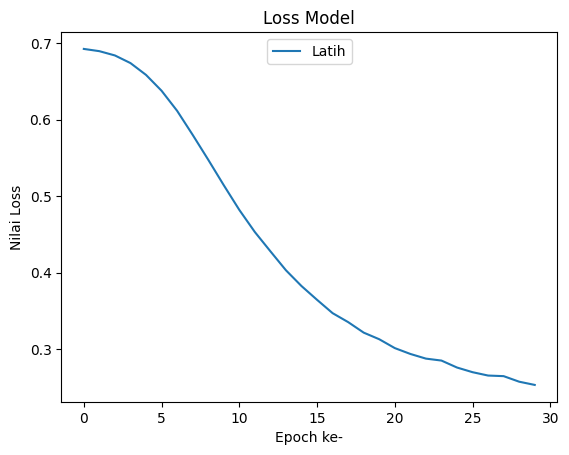

In [ ]:
# menampilkan plot Loss
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.title('Loss Model')
plt.ylabel('Nilai Loss')
plt.xlabel('Epoch ke-')
plt.legend(['Latih'], loc='upper center')
plt.show()

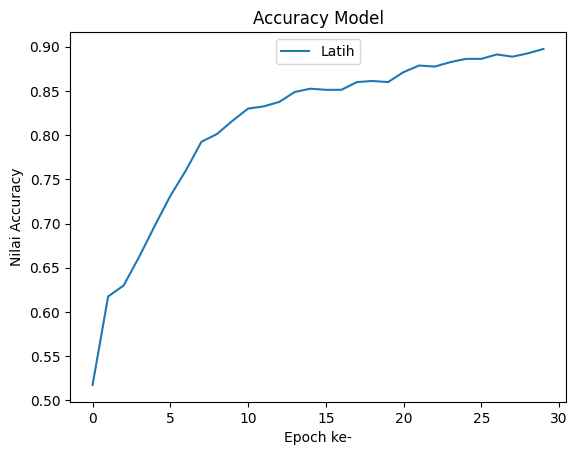

In [ ]:
# menampilkan plot akurasi
# YOUR CODE HERE
plt.plot(history.history['accuracy'])
plt.title('Accuracy Model')
plt.ylabel('Nilai Accuracy')
plt.xlabel('Epoch ke-')
plt.legend(['Latih'], loc='upper center')
plt.show()

# 5. Make Your Own Model

In [ ]:
# YOUR CODE HERE
import tensorflow as tf
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(250, 20, input_length=20),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24, activation='relu'),
    # tambahkan 1 layers Dense terakhir
    # YOUR CODE HERE
    tf.keras.layers.Dense(1, activation='sigmoid'),
])

# Buatlah model.compile seperti yang sudah dipelajari
# YOUR CODE HERE
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# YOUR CODE HERE
# Buatlah model.fit untuk melatih data

num_epochs = 30
history = model.fit(padded_latih, y_latih, epochs=num_epochs, validation_data=(padded_test, y_test)) # YOUR CODE HERE

Epoch 1/30
25/25 [==============================] - 1s 11ms/step - loss: 0.6924 - accuracy: 0.5375 - val_loss: 0.6914 - val_accuracy: 0.5800
Epoch 2/30
25/25 [==============================] - 0s 4ms/step - loss: 0.6896 - accuracy: 0.6100 - val_loss: 0.6895 - val_accuracy: 0.5700
Epoch 3/30
25/25 [==============================] - 0s 3ms/step - loss: 0.6849 - accuracy: 0.6325 - val_loss: 0.6851 - val_accuracy: 0.5750
Epoch 4/30
25/25 [==============================] - 0s 5ms/step - loss: 0.6766 - accuracy: 0.6513 - val_loss: 0.6782 - val_accuracy: 0.6100
Epoch 5/30
25/25 [==============================] - 0s 4ms/step - loss: 0.6633 - accuracy: 0.6925 - val_loss: 0.6664 - val_accuracy: 0.6350
Epoch 6/30
25/25 [==============================] - 0s 4ms/step - loss: 0.6426 - accuracy: 0.7113 - val_loss: 0.6494 - val_accuracy: 0.6400
Epoch 7/30
25/25 [==============================] - 0s 5ms/step - loss: 0.6121 - accuracy: 0.7550 - val_loss: 0.6265 - val_accuracy: 0.6700
Epoch 8/30
25/25 [=

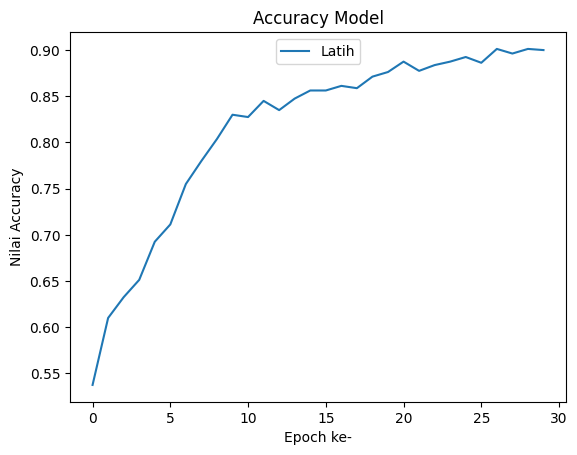

In [ ]:
# menampilkan plot akurasi
# YOUR CODE HERE
plt.plot(history.history['accuracy'])
plt.title('Accuracy Model')
plt.ylabel('Nilai Accuracy')
plt.xlabel('Epoch ke-')
plt.legend(['Latih'], loc='upper center')
plt.show()

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(350, 20, input_length=20),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),  # Menambahkan lapisan Dense tambahan
    tf.keras.layers.Dense(1, activation='sigmoid'),
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# YOUR CODE HERE
# Buatlah model.fit untuk melatih data

num_epochs = 30
history = model.fit(padded_latih, y_latih, epochs=num_epochs, validation_data=(padded_test, y_test)) # YOUR CODE HERE

Epoch 1/30
25/25 [==============================] - 1s 9ms/step - loss: 0.6929 - accuracy: 0.5213 - val_loss: 0.6925 - val_accuracy: 0.4800
Epoch 2/30
25/25 [==============================] - 0s 3ms/step - loss: 0.6905 - accuracy: 0.5938 - val_loss: 0.6906 - val_accuracy: 0.5150
Epoch 3/30
25/25 [==============================] - 0s 4ms/step - loss: 0.6851 - accuracy: 0.6075 - val_loss: 0.6844 - val_accuracy: 0.5750
Epoch 4/30
25/25 [==============================] - 0s 3ms/step - loss: 0.6741 - accuracy: 0.6762 - val_loss: 0.6754 - val_accuracy: 0.6050
Epoch 5/30
25/25 [==============================] - 0s 3ms/step - loss: 0.6525 - accuracy: 0.7175 - val_loss: 0.6549 - val_accuracy: 0.6750
Epoch 6/30
25/25 [==============================] - 0s 4ms/step - loss: 0.6128 - accuracy: 0.7600 - val_loss: 0.6301 - val_accuracy: 0.6800
Epoch 7/30
25/25 [==============================] - 0s 5ms/step - loss: 0.5579 - accuracy: 0.7975 - val_loss: 0.5770 - val_accuracy: 0.6950
Epoch 8/30
25/25 [==

In [ ]:
# keluarkan hasil prediksi dengan data baru
kata_baru = ['Cant say enough good things about this place.', 'this place too messy']
# YOUR CODE HERE
sekuens_baru = tokenizer.texts_to_sequences(kata_baru)

padded_baru = pad_sequences(sekuens_baru, maxlen=20)

prediksi = model.predict(padded_baru)
print(prediksi)

for i, kalimat in enumerate(kata_baru):
  print(kalimat)
  print("sentimen", "positif" if prediksi[i] > 0.5 else "negatif")

1/1 [==============================] - 0s 97ms/step
[[0.984236  ]
 [0.03210262]]
Cant say enough good things about this place.
sentimen positif
this place too messy
sentimen negatif
